In [2]:
import networkx as nx
import numpy as np
import pandas as pd
from Communities import *
import seaborn as sns

### British lung fundation

In [ ]:
# df_com_l = pd.read_csv("./Data_lungs/df_com_clean.csv", parse_dates = ["time"]) # original one
df_com_l = pd.read_csv("./Data_lungs/df_com_clean.csv", parse_dates = ["time"])

In [3]:
df_com_l.head(3)

,text,author,likes,time,id,parent_id,url,target,text_processed,text_lemmatised
0,I had rituximab about three years ago for rhue...,ChaOliver,1,2017-12-16 05:50:00,tc_0,p_0,https://healthunlocked.com/asthmalunguk-lung/p...,Barnesy77,rituximab three years ago rhuematoid art ra pa...,"['rituximab', 'year', 'ago', 'rhuematoid', 'ar..."
1,"Thanks ChaOliver, glad to hear that there were...",Barnesy77,0,2017-12-17 10:40:00,s_0,tc_0,https://healthunlocked.com/asthmalunguk-lung/p...,ChaOliver,thanks chaoliver glad hear side effects,"['thank', 'chaoliver', 'glad', 'hear', 'effect']"
2,I have had both. I started on cyclophosphamide...,AngieB72,2,2017-12-16 07:30:00,tc_1,p_0,https://healthunlocked.com/asthmalunguk-lung/p...,Barnesy77,started cyclophosphamide 3 treatments realised...,"['start', 'cyclophosphamide', '3', 'treatment'..."


In [4]:
G = network(df_com_l[(df_com_l.author != "Hidden") & (df_com_l.target != "Hidden")], source = "author", target = "target", plot = False, )

Info: Name: 
Type: Graph
Number of nodes: 10129
Number of edges: 103953
Average degree:  20.5258 - Density: 0.0020266406952212197 - assortativity : -0.222441094591725 - clustering coefficient: 0.3005061985516435
Number of communities:32


In [5]:
nx.write_gexf(G, "grapg_lung.gexf")

In [9]:
infl_l = top_central(G, central_type = "voterank")

In [18]:
infl_l

,Id,voterank
0,sassy59,0
1,Ergendl,1
2,Caspiana,2
3,peege,3
4,Damon1864,4
...,...,...
3145,Lizzypick,3145
3146,Twinsmum10,3146
3147,Lunus,3147
3148,san37,3148


In [19]:
# infl_l.to_csv("./Data_lungs/influencers_lungs.csv", index = False)

In [10]:
com_l = return_communities(df_com_l[(df_com_l.author != "Hidden") & (df_com_l.target != "Hidden")], G)

### Asthma 

In [47]:
df_com_a = pd.read_csv("./Data_asthma/Official/df_com_off_clean.csv", parse_dates = ["time"])
df_com_a.head(3)

,text,author,likes,time,id,parent_id,url,target,text_processed,text_lemmatised
0,It has been diagnosed that my breathlessness i...,Homely2,1,2023-07-21 12:02:00,tc_0,p_0,https://healthunlocked.com/asthmalunguk-asthma...,My_fairy,diagnosed breathlessness asthma related four t...,"['diagnose', 'breathlessness', 'asthma', 'rela..."
1,Thanks for detailed reply,My_fairy,0,2023-07-22 08:46:00,s_0,tc_0,https://healthunlocked.com/asthmalunguk-asthma...,Homely2,thanks detailed reply,"['thank', 'detailed', 'reply']"
2,Good morning My_fairy. I was diagnosed as havi...,Bingo88,1,2023-07-22 05:41:00,tc_1,p_0,https://healthunlocked.com/asthmalunguk-asthma...,My_fairy,good morning myfairy diagnosed asthma markers ...,"['good', 'morning', 'myfairy', 'diagnose', 'as..."


In [7]:
G = network(df_com_a[(df_com_a.author != "Hidden") & (df_com_a.target != "Hidden")], source = "author", target = "target", plot = False, )

Info: Name: 
Type: Graph
Number of nodes: 5014
Number of edges: 30073
Average degree:  11.9956 - Density: 0.0023929009147417354 - assortativity : -0.17094322306245957 - clustering coefficient: 0.20789859529651858
Number of communities:23


In [8]:
nx.write_gexf(G, "graph_asthma.gexf")

In [20]:
infl_a = top_central(G, central_type = "voterank")

In [23]:
infl_a

,Id,voterank
0,Poobah,0
1,EmmaF91,1
2,twinkly29,2
3,Lysistrata,3
4,Wheezycat,4
...,...,...
1643,Newproblems,1643
1644,dan2406,1644
1645,SteK78,1645
1646,Julesc12,1646


In [21]:
# infl_a.to_csv("./Data_asthma/Official/influencers_asthma.csv", index = False)

In [22]:
communities_a = return_communities(df_com_a[(df_com_a.author != "Hidden") & (df_com_a.target != "Hidden")], G)

### Influencers

In [6]:
def top_percentuale(df, perc):
    length = df.shape[0]
    end = round(length * perc)
    return df[:end]

In [7]:
def find_sentiment(df, authors):
    values = df_a[df_a.author.isin(authors)].value_counts("sentiment")
    tot = values.sum()
    perc = values / tot * 100
    print(f"sono presenti {values[0]} commenti positivi ({round(perc[0],2)}%) \nsono presenti {values[1]} commenti neutri ({round(perc[1],2)}%) \nsono presenti {values[2]} commenti negativi ({round(perc[2],2)}%)")
    return values, perc

In [4]:
infl_a = pd.read_csv("./Data_asthma/Official/influencers_asthma.csv")
infl_l = pd.read_csv("./Data_lungs/influencers_lungs.csv")

In [3]:
df_a = pd.read_csv("./Df completi/df_com_asthma.csv", parse_dates = ["time"])
df_l = pd.read_csv("./Df completi/df_com_lungs.csv", parse_dates = ["time"])

In [8]:
top_infl_a = list(top_percentuale(infl_a, 0.01).Id)
not_infl_a = list(df_a[~ df_a.author.isin(top_infl_a)].author)

In [9]:
top_infl_l = list(top_percentuale(infl_l, 0.01).Id)
not_infl_l = list(df_l[~ df_l.author.isin(top_infl_l)].author)

In [10]:
_, _ = find_sentiment(df_a, top_infl_a)
_, _ = find_sentiment(df_a, not_infl_a)

sono presenti 11601 commenti positivi (60.63%) 
sono presenti 2037 commenti neutri (10.65%) 
sono presenti 5496 commenti negativi (28.72%)
sono presenti 41101 commenti positivi (60.55%) 
sono presenti 9126 commenti neutri (13.44%) 
sono presenti 17657 commenti negativi (26.01%)


In [11]:
_, _ = find_sentiment(df_l, top_infl_l)
_, _ = find_sentiment(df_l, not_infl_l)

sono presenti 861 commenti positivi (61.46%) 
sono presenti 222 commenti neutri (15.85%) 
sono presenti 318 commenti negativi (22.7%)
sono presenti 19973 commenti positivi (60.59%) 
sono presenti 4579 commenti neutri (13.89%) 
sono presenti 8414 commenti negativi (25.52%)


### Check sentiment overtime

In [86]:
df_a["year"] = df_a.time.dt.year
df_l["year"] = df_l.time.dt.year
df_a["month"] = df_a.time.dt.month
df_l["month"] = df_l.time.dt.month

In [87]:
date_asthma_sa_y = df_a.groupby(['year', 'sentiment'], as_index = False).agg({'author':'count'})
date_asthma_sa_y['logcount'] = [np.log(x) for x in date_asthma_sa_y.author]

In [88]:
date_asthma_sa_m = df_a.groupby(['year',"month", 'sentiment'], as_index = False).agg({'author':'count'})
date_asthma_sa_m["date"] = date_asthma_sa_m.year.apply(str) + "-" + date_asthma_sa_m.month.apply(str)
date_asthma_sa_m['logcount'] = [np.log(x) for x in date_asthma_sa_m.author]
date_asthma_sa_m["tot_post"] = date_asthma_sa_m.groupby("date")["author"].transform("sum")
date_asthma_sa_m["%"] = date_asthma_sa_m.author / date_asthma_sa_m.tot_post * 100

In [89]:
date_lungs_sa_y = df_l.groupby(['year', 'sentiment'], as_index = False).agg({'author':'count'})
date_lungs_sa_y['logcount'] = [np.log(x) for x in date_lungs_sa.author]

In [98]:
date_lungs_sa_m = df_l.groupby(['year',"month", 'sentiment'], as_index = False).agg({'author':'count'})
date_lungs_sa_m["date"] = date_lungs_sa_m.year.apply(str) + "-" + date_lungs_sa_m.month.apply(str)
date_lungs_sa_m['logcount'] = [np.log(x) for x in date_lungs_sa_m.author]
date_lungs_sa_m["tot_post"] = date_lungs_sa_m.groupby("date")["author"].transform("sum")
date_lungs_sa_m["%"] = date_lungs_sa_m.author / date_lungs_sa_m.tot_post * 100

<AxesSubplot:xlabel='year', ylabel='logcount'>

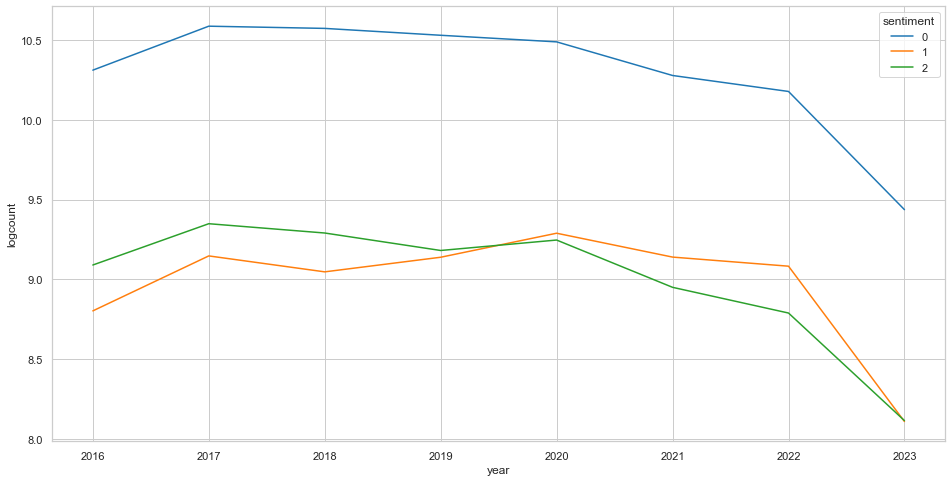

In [15]:
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("Paired")
sns.lineplot(data = date_lungs_sa_y, x = 'year', y = 'logcount', hue = 'sentiment', palette= "tab10")

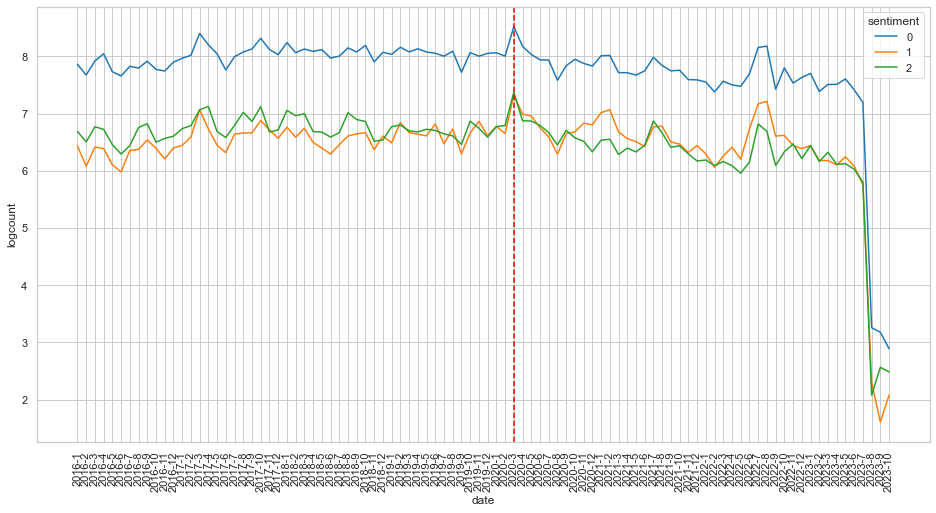

In [99]:
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("Paired")
g = sns.lineplot(data = date_lungs_sa_m, x = 'date', y = 'logcount', hue = 'sentiment', palette= "tab10")
plt.xticks(rotation=90)
g.axvline(x=50, color='red', linestyle='--')

<AxesSubplot:xlabel='year', ylabel='logcount'>

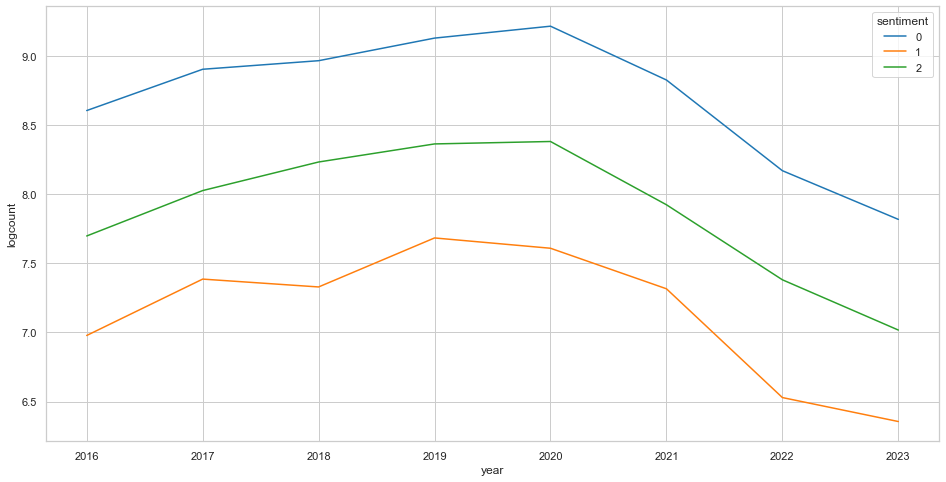

In [16]:
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("Paired")
sns.lineplot(data = date_asthma_sa_y, x = 'year', y = 'logcount', hue = 'sentiment', palette= "tab10")

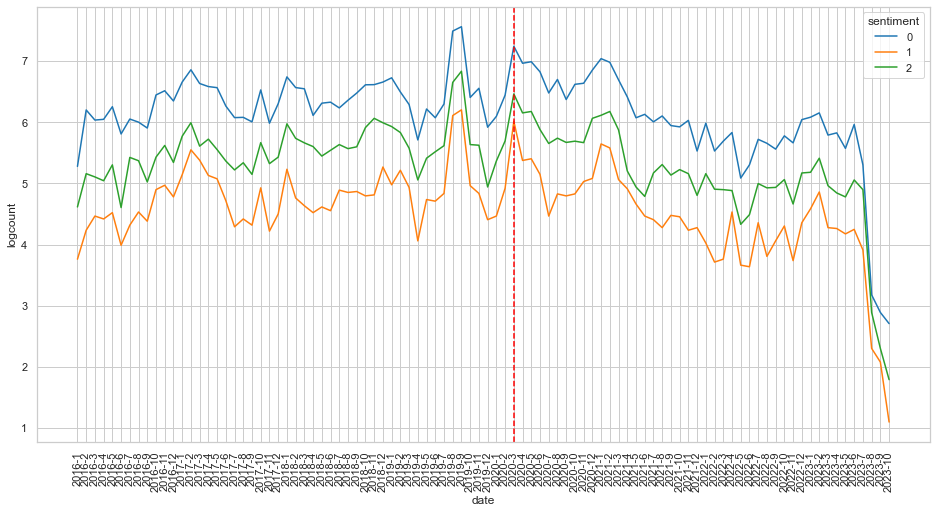

In [93]:
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("Paired")
g = sns.lineplot(data = date_asthma_sa_m, x = 'date', y = 'logcount', hue = 'sentiment', palette= "tab10")
plt.xticks(rotation=90)
g.axvline(x=50, color='red', linestyle='--')